In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Loading the dataset
df = pd.read_csv("co2_emission.csv") 
df.head() 
df.isnull().sum() # for missing values

df.describe() # for summary


,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [14]:
print(df.columns)

Index(['Entity', 'Code', 'Year', 'CO2_emissions'], dtype='object')


In [16]:
selected_columns = ['Entity', 'Code', 'Year', 'CO2_emissions']

df_selected = df[selected_columns]
df_selected = df_selected[df_selected['Entity'] =='Kenya']
df_selected.head(10)
selected_columns = ['Entity', 'Code', 'Year', 'CO2_emissions']

df_selected = df[selected_columns]
df_selected = df_selected[df_selected['Entity'] =='Kenya']
df_selected.head(10)
                

,Entity,Code,Year,CO2_emissions
10763,Kenya,KEN,1950,908672.00
10764,Kenya,KEN,1951,1392320.00
10765,Kenya,KEN,1952,1590176.00
10766,Kenya,KEN,1953,1513232.00
10767,Kenya,KEN,1954,1700096.00
10768,Kenya,KEN,1955,1985888.00
10769,Kenya,KEN,1956,2220384.00
10770,Kenya,KEN,1957,2282672.00
10771,Kenya,KEN,1958,2088480.00
10772,Kenya,KEN,1959,2208114.22


In [23]:
X = df_selected[['Year']] # Feature
y = df_selected['CO2_emissions'] # Target Variable

In [24]:
# 80% Training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared:{r2}")

Mean Squared Error: 1848491078563.3416
R-Squared:0.8969045267432529


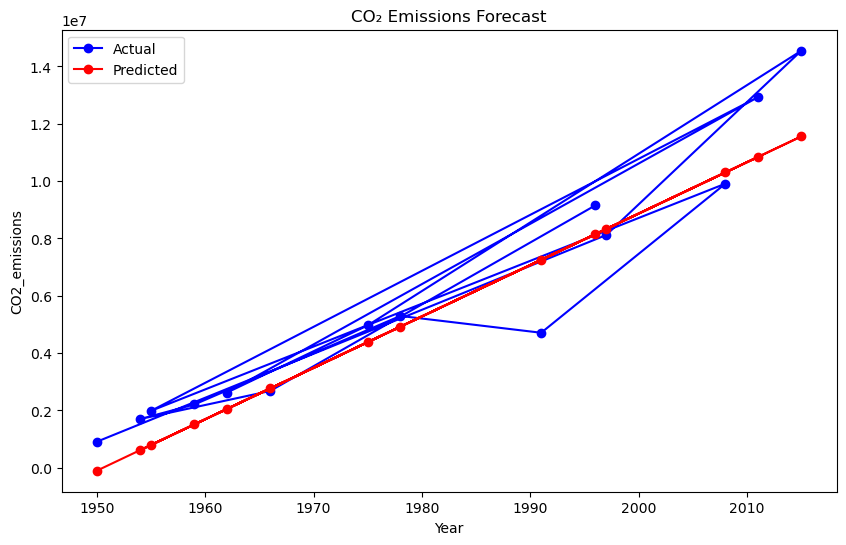

In [25]:
# Plotting
plt.figure(figsize=(10,6))
# actual CO2 emissions
plt.plot(X_test, y_test, color='blue', linestyle='-', marker='o', label="Actual")

# predicted CO2 emissions 
plt.plot(X_test, y_pred, color='red', linestyle='-', marker='o', label="Predicted")

plt.xlabel("Year")
plt.ylabel("CO2_emissions")
plt.title("CO₂ Emissions Forecast")

plt.legend()
plt.show()